In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def flux(ABmag, weff):
    return 10 ** (-0.4 * (ABmag - 22.5)) * 3.631e-6 * 1e-23 * (3e18 / weff ** 2)

def integrated_flux(SED, passband):
    mask = (passband[0, 0] <= SED[:, 0])&(SED[:, 0] <= passband[-1, 0])
  
    ipassband = interp(SED[mask, 0], passband[:, 0], passband[:, 1])

    return trapz(SED[mask, 0]*SED[mask, 1]*ipassband, SED[mask, 0])/trapz(SED[mask, 0]*ipassband, SED[mask, 0])

In [3]:
f = open("Challenge_JPAS1.des.dat", "r")
hdr1 = f.readline()[:-1].split()
jpas1 = loadtxt(f)
f.close()

f = open("Challenge_JPAS2.des.dat", "r")
hdr2 = f.readline()[:-1].split()
jpas2 = loadtxt(f)
f.close()

f = open("Challenge_PLUS1.des.dat", "r")
hdr3 = f.redline()[:-1].split()
jplus = loadtxt(f)
f.close()

sed_ids = loadtxt("redshifts.challenge.dat", dtype=int, usecols=(0,))
z       = loadtxt("redshifts.challenge.dat", usecols=(1,))

nfil = len(hdr1)+len(hdr2)-2

jpas_wlp  = array([.535, .165]+[.145]*53)
jpas_wls  = array([[eval(f[3:])+p] for f, p in zip(hdr1[1:]+hdr2[1:], jpas_wlp)]).repeat(98, 1).T

jplu_wls  = array([])

jpas_ids  = jpas1[::2, 0]
jpas_mags = column_stack((jpas1[::2, 1:], jpas2[::2, 1:]))
jpas_errs = column_stack((jpas1[1::2, 1:], jpas2[1::2, 1:]))

jpas_flux = flux(jpas_mags, jpas_wls)
jpas_ferr = jpas_flux*jpas_errs/1.0857

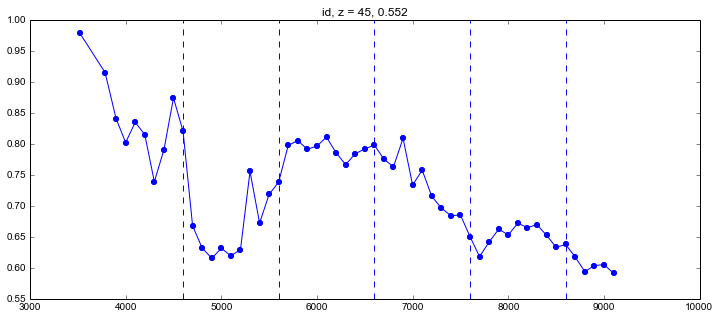

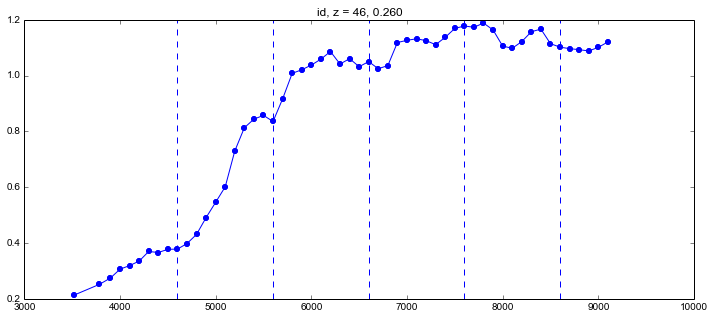

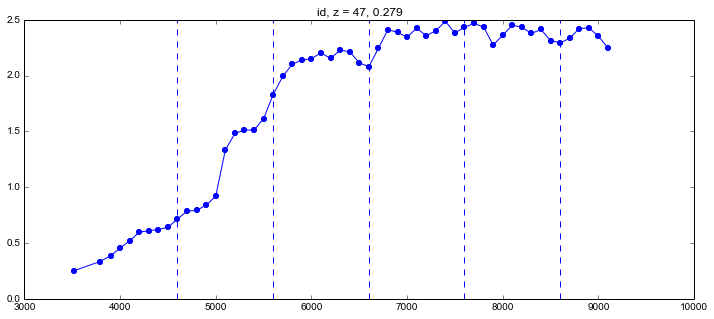

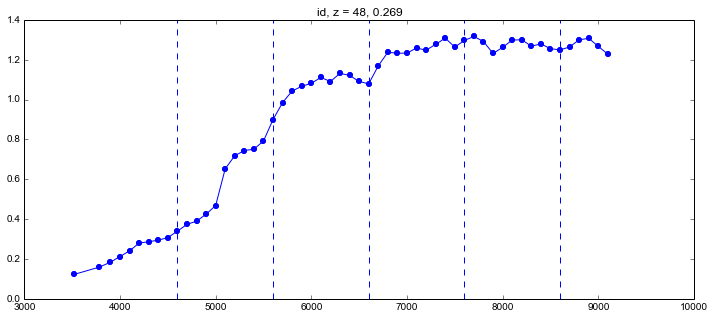

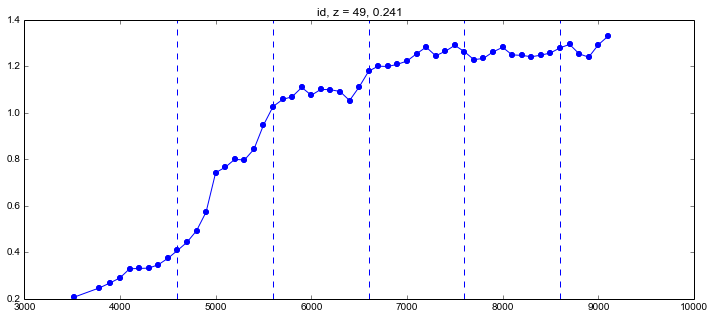

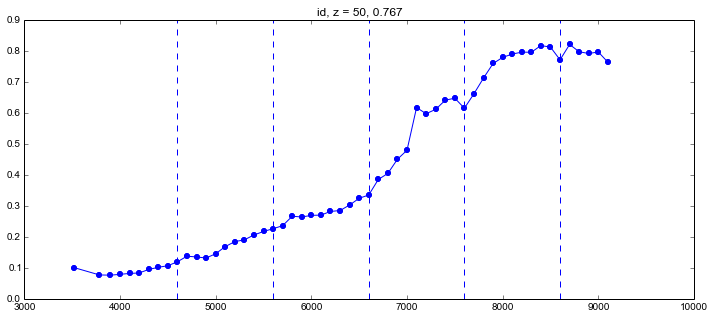

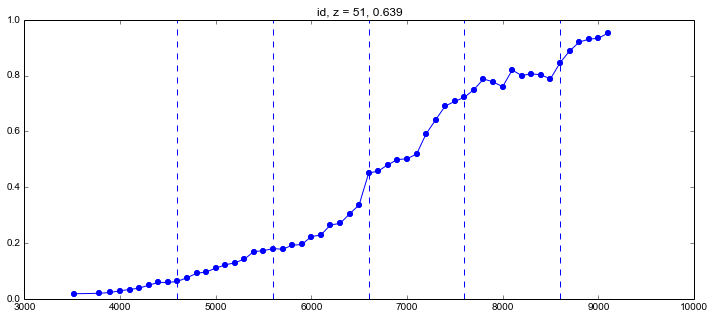

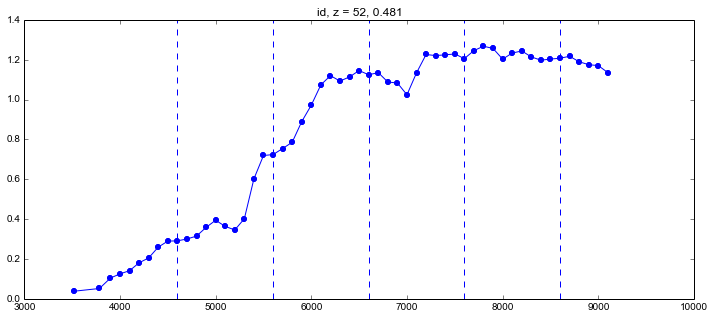

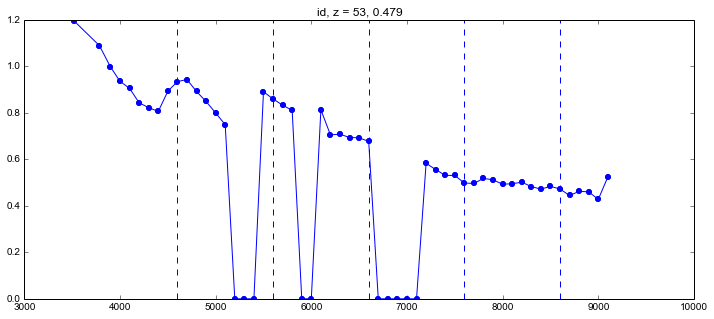

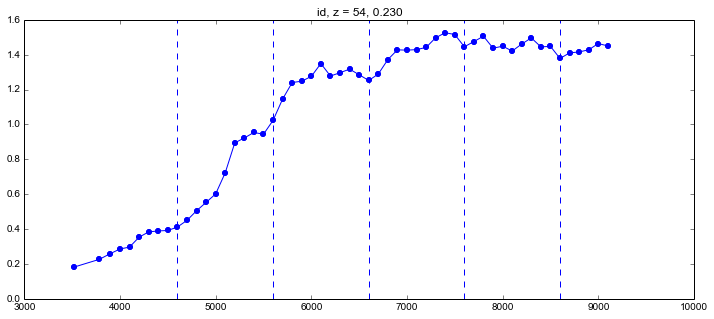

In [12]:
mask = ones((98, 55))

mask[9][53] = 0.0
mask[16][11:13] = 0.0
mask[16][26:29] = 0.0
mask[16][47:49] = 0.0
mask[25][34:38] = 0.0
mask[32][11] = 0.0
mask[32][46:48] = 0.0
mask[44][7:10] = 0.0
mask[44][16] = 0.0
mask[44][[31, 33]] = 0.0
mask[52][15:18] = 0.0
mask[52][22:24] = 0.0
mask[52][30:35] = 0.0
mask[63][44:46] = 0.0
mask[78][46:50] = 0.0
mask[87][14:16] = 0.0
mask[87][29:33] = 0.0
mask[87][52:54] = 0.0

wl = jpas_wls[0]

for i in xrange(44,54):
    fl = jpas_flux[i]*mask[i]
    figure(figsize=(12, 5))
    gca().set_title("id, z = {0:02d}, {1:5.3f}".format(sed_ids[i], z[i]))
    plot(wl, fl, '-o', mew=0)
    #xlabel("Wavelength")
    #ylabel("Flux")
    #savefig("SED{0:02d}".format(sed_ids[i])+".pdf", bbox_inches="tight")
    for w in wl[9::10]: axvline(w, ls="--")

In [7]:
for i in xrange(98):
    f = open("sed{0:02d}.txt".format(i+1), "w")
    f.write("# redshift = {0:5.3f}\n".format(z[i]))
    f.write("#\n")
    f.write("# {0:11s}{1:12s}{2:12s}\n".format("wlength", "flux", "error"))
    savetxt(f, column_stack((jpas_wls[i], jpas_flux[i]*mask[i], jpas_ferr[i]*mask[i])), fmt="%11.4f%12.4e%12.4e")
    f.close()